# Rainbow of Sound

In [20]:
%matplotlib inline
import sys
sys.path.append('../ThinkDsp')
import thinkdsp
import thinkplot

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import animation, rc
from IPython.display import HTML, Image

resol = 0.0001

rc('animation', html='html5')

## Sine function

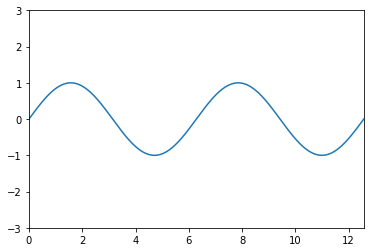

In [3]:
f = 1/(2 * np.pi) 
a = 1.0

t = 1/f
x = np.arange(0, 2*t, resol)
y = a * np.sin(2*np.pi*f*x)

plt.axis([0, 4*np.pi, -3, 3])
plt.plot(x, y)
plt.show()

## Spectrum of guitar

In [4]:
wave = thinkdsp.read_wave('A4_guitar.wav')
wave.make_audio()

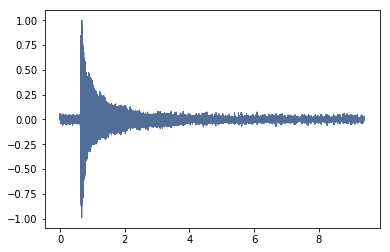

In [5]:
wave.plot(linewidth=1)

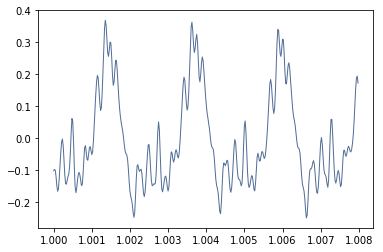

In [6]:
segment = wave.segment(start=1, duration=0.008)
segment.plot(linewidth=1)

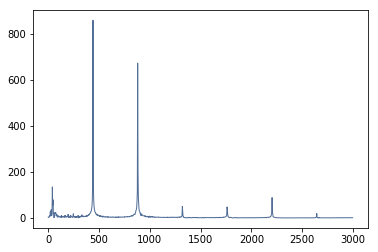

In [7]:
segment = wave.segment(start=1, duration=0.3)
spectrum = segment.make_spectrum()
spectrum.plot(high=3000,linewidth=1)

## Fourier series

$F(t)$ is a periodic function of whic the period $T$ seconds. Define $\nu = 1/T$.
$$
	F(t) = \frac{1}{2} a_0 + \sum_{n=1}^{\infty} \left( a_n \cos(2n\pi \nu t) + b_n \sin(2n \pi \nu t)  \right)
$$

\begin{eqnarray*}
	a_n & = & 2 \nu \int_{0}^{T} \cos(2n\pi \nu t) F(t) d t \\
	b_n & = & 2 \nu \int_{0}^{T} \sin(2n\pi \nu t) F(t) d t
\end{eqnarray*}	


In [4]:
t = 2*np.pi
resol = t/1000


def plot_p_terms(p):
    x = np.arange(0, 2*t, resol)
    y = np.full(len(x),a[0])
    for i in range(1,p):
        y = y + a[i] * np.sin(x*i)

    plt.axis([0, 2*t, np.max(y)*-1.5, np.max(y)*1.5])
    plt.plot(x, y)
    plt.show()

### Example 1

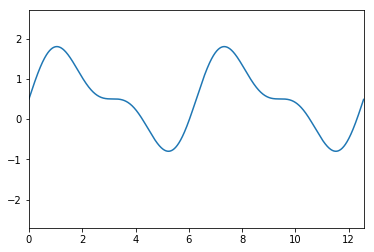

In [5]:
a = [0.5, 1.0, 0.5, 0.5, 0.2, 0.1]

plot_p_terms(3)

In [6]:
%%capture

fig, ax = plt.subplots()
ax.set_xlim(( 0, 12))
ax.set_ylim((-4, 4))
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x = np.arange(0, 4*t, resol)
    y = np.full(len(x),a[0])
    for v in range(1,i):
        y = y + a[v] * np.sin(x*v)

    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(a), interval=5000/len(a), blit=True)

In [7]:
HTML(anim.to_jshtml())

### Example 2

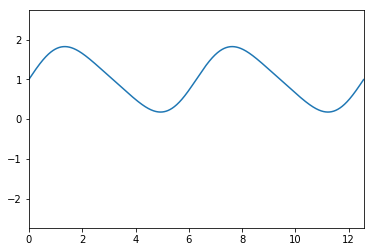

In [8]:
a = [1.0, 0.8, 0.1, 0.1, 0.2, 0.1]

plot_p_terms(3)

In [10]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(a), interval=5000/len(a), blit=True)
HTML(anim.to_jshtml())

### Example 3

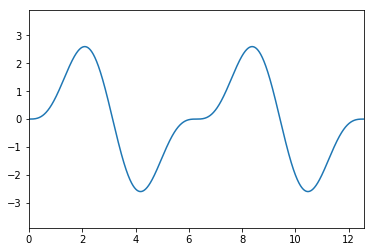

In [11]:
# f(x) = x
a = [0.0, 2*1.0, -2*1/2, 2*1/3, -2*1/4, 2*1/5, -2*1/6, 2*1/7, -2*1/8, 2*1/9, -2*1/10, 2*1/11, -2*1/12]

plot_p_terms(3)

In [13]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(a), interval=5000/len(a), blit=True)
HTML(anim.to_jshtml())

### Example 4

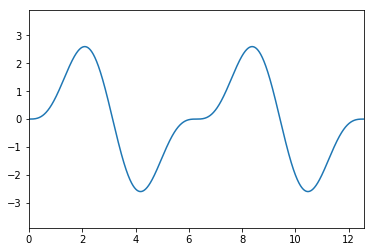

In [14]:
# f(x) = x
a = np.full(40,0.0)
a[0] = 0.0
for i in range(1,40):
    a[i] = 2*(-1)**(i+1) * 1/i

plot_p_terms(3)

In [15]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(a), interval=5000/len(a), blit=True)
HTML(anim.to_jshtml())

### Example 5

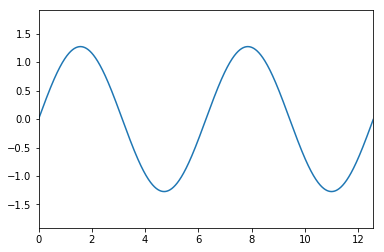

In [16]:
# square wave
a = np.full(50,0.0)
a[0] = 0.0
for m in range(1, 50):
    if (m%2 == 1):
        a[m] = 4/(m*np.pi)

plot_p_terms(3)

In [18]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(a), interval=5000/len(a), blit=True)
HTML(anim.to_jshtml())

## Time window of Fourier transform 

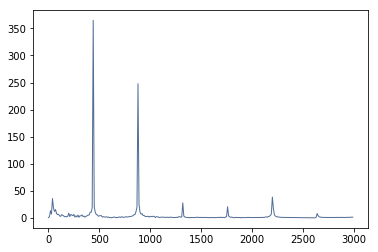

In [19]:
window_width = 0.1

wave = thinkdsp.read_wave('A4_guitar.wav')
segment = wave.segment(start=1, duration=window_width)
spectrum = segment.make_spectrum()
spectrum.plot(high=3000,linewidth=1)